## TP4 : Le problème de Monty Hall

In [2]:
from random import randint 
for i in range(50): 
    print(randint(0,2),end=" ")

1 1 0 1 0 0 2 2 2 0 2 2 0 2 0 2 1 0 0 1 2 2 2 2 1 2 2 0 2 1 2 1 2 0 0 2 2 2 2 0 0 2 2 2 0 1 0 1 1 0 

## Stratégie 1
mon choix est fixé au départ, je ne change pas d'avis

In [3]:
wins=0
for i in range(1000):
    ## généré le choix de la porte gagnante
    wining_door=randint(0,2)
    ## généré le choix du joueur
    player_choice=randint(0,2)
    if wining_door==player_choice:
        wins+=1
print("wins=",wins)

wins= 350


## Stratégie 2 
#### Changement systématique de choix après l'ouverture d'une porte
Question 2

In [4]:
wins=0
for i in range(1):
    winning_door=randint(0,2)
    player_choice=randint(0,2)
    if winning_door==player_choice:
        print("winning_door=",winning_door)
        print("player_choice=",player_choice)
        open_door={0,1,2}-{winning_door}
        print("possibilités de open_door",open_door)
        open_door=list(open_door)[randint(0,1)]
        print("open_door=",open_door)
    else : 
        print("Winning_door et player_choice sont différents")

Winning_door et player_choice sont différents


Question 3

In [5]:
wins=0
for i in range(1000):
    ## généré le choix de la porte gagnante
    winning_door=randint(0,2)
    ## généré le choix du joueur
    player_choice=randint(0,2)
    ## généré le choix du présentateur
    if winning_door==player_choice:
        open_door={0,1,2}-{winning_door}
        open_door=list(open_door)[randint(0,1)]
    else :
        open_door={0,1,2}-{winning_door,player_choice}
        open_door=list(open_door)[0]
    ## le joueur change de porte
    player_choice={0,1,2}-{open_door,player_choice}
    player_choice=list(player_choice)[0]
    if winning_door==player_choice:
        wins+=1

print("wins=",wins)

wins= 667


##### Question 4 : Comparaison des stratégies et conclusion
Nous lançons le jeu 10000 fois, avec les deux stratégies, et nous comptons le nombre de victoires pour chaque stratégie.

In [6]:
wins_strategy_nePasChangerAvis=0
wins_strategy_changerAvis=0
for i in range(10000):
    ## généré le choix de la porte gagnante
    winning_door=randint(0,2)
    ## généré le choix du joueur
    player_choice=randint(0,2)
    ## généré le choix du présentateur
    if winning_door==player_choice:
        wins_strategy_nePasChangerAvis+=1
        open_door={0,1,2}-{winning_door}
        open_door=list(open_door)[randint(0,1)]
    else :
        open_door={0,1,2}-{winning_door,player_choice}
        open_door=list(open_door)[0]
    ## le joueur change de porte
    player_choice={0,1,2}-{open_door,player_choice}
    player_choice=list(player_choice)[0]
    if winning_door==player_choice:
        wins_strategy_changerAvis+=1
print("Le joueur ne change jamais d’avis, nbr de partie gagné",wins_strategy_nePasChangerAvis)
print("Le joueur change systématiquement d’avis, nbr de partie gagné",wins_strategy_changerAvis)

Le joueur ne change jamais d’avis, nbr de partie gagné 3308
Le joueur change systématiquement d’avis, nbr de partie gagné 6692


Nous pourrions conclure que la stratégie 2 est plus avantageuse que la stratégie 1 comme vu en théorique.

# Avec un ordinateur quantique

##### Mise en place de la voiture derrière une porte

In [7]:
from qiskit import QuantumRegister, QuantumCircuit, Aer, transpile, assemble, execute

qc = QuantumCircuit(3)
qc.ry(1.91,0)
qc.barrier()
qc.ch(0,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.x(0)
qc.measure_all()
qc.draw('mpl')

c:\Users\erraz\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Analyse du circuit :  
Calcul des états depuis |Ψi⟩ :  
$|Ψ0\rangle = |000\rangle$  
porte Ry : $|Ψ1\rangle = \frac{1}{\sqrt{3}}|000\rangle + \frac{\sqrt{2}}{\sqrt{3}}|100\rangle$  
porte CH : $|Ψ2\rangle = \frac{1}{\sqrt{3}}(|000\rangle + |100\rangle + |110\rangle)$  
porte CNOT  1 : $|Ψ3\rangle = \frac{1}{\sqrt{3}}(|000\rangle + |100\rangle + |111\rangle)$  
porte CNOT 2 : $|Ψ4\rangle = \frac{1}{\sqrt{3}}(|000\rangle + |110\rangle + |101\rangle)$  
porte X : $|Ψ5\rangle = \frac{1}{\sqrt{3}}(|100\rangle + |010\rangle + |001\rangle)$  
Nous pouvons voir que à la fin, nous avons la même probabilité de trouver la voiture derrière chaque porte.
Nous pouvons vérifier cela avec un simulateur

In [8]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for execution
qobj = assemble(transpiled_qc)

# Execute the job on the simulator
result = simulator.run(qobj).result()

# Get and plot the histogram of results
counts = result.get_counts()
plot_histogram(counts)

C:\Users\erraz\AppData\Local\Temp\ipykernel_16928\2112640086.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


les résultats sont cohérents avec les calculs théoriques. La fréquence de chaque résultat est de 1/3.

## Décision de Monty

A nouveau on suppose (sans perte de généralité) que le joueur annonce son intention d’ouvrir
la porte numéro 2. Les situations (a), (b) et (c) sont celles décrites plus haut (la voiture est
respectivement derrière la porte 0, 1 et 2).
On ajoute maintenant un quatrième qubit q3 à ce circuit, ce qubit va déterminer laquelle
des portes (0 ou 1) Monty va ouvrir, de la manière suivante :
— si l’état de q3 est à |0⟩ alors Monty ouvre la porte 0,
— si l’état de q3 est à |1⟩ alors Monty ouvre la porte 1,
— ce codage sur un qubit suffit, car bien évidemment Monty n’a la possibilité d’ouvrir que
la porte 0 ou la porte 1 (le joueur ayant choisi la porte 2).
Pour modifier l’état de ce qubit, on veut que :
— dans la situation (a) voiture derrière la porte 0 : Monty va ouvrir la porte 1 en d’autres
termes si q0 est à |1⟩ on veut mettre q3 à |1⟩, et si q0 est à 0 (la voiture n’est pas derrière
la porte 0 : on laisse q3 à |0⟩
— dans la situation (b)voiture derrière la porte 1 : on veut ouvrir la porte 0, donc on veut
que q3 soit à |0⟩ si q1 est à |1⟩, comme q3 est déjà à |0⟩, on ne fait rien.
— dans la situation (c) voiture derrière la porte 2, alors Monty va ouvrir au hasard la porte
0 ou la porte 1, c’est à dire : si q2 est à 1, on veut mettre q3 en superposition (état |+⟩).




le joueur annonce son intention d’ouvrir la porte numéro 2 (q2).
1.  Le circuit avec le qubit q3 et les portes nécessaires.

In [9]:
qc = QuantumCircuit(4)
qc.barrier()
qc.ry(1.91,0)
qc.barrier()
qc.ch(0,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.x(0)
qc.barrier()
qc.cx(0,3)
qc.ch(2,3)
qc.measure_all()
qc.draw('mpl')

Nous mesurons l'état de sortie de ce circuit, et nous obtenons les résultats suivants :

In [10]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for execution
qobj = assemble(transpiled_qc)

# Execute the job on the simulator
result = simulator.run(qobj).result()

# Get and plot the histogram of results
counts = result.get_counts()
plot_histogram(counts)

C:\Users\erraz\AppData\Local\Temp\ipykernel_16928\2112640086.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Explication des résultats :
- Explication de l'ouverture de la porte par Monty :  
Dans chaque état de sortie, le 4ème qubit est le choix de Monty. Si le 4ème qubit est à l'état |1⟩ alors Monty ouvre la porte 1 (qubit 1) et si l'état est à |0⟩ alors il ouvre la porte 0. 
L'état |1⟩ dans les 3 premiers qubits signifie que la voiture est derrère ce qubit. 
Exemple : |100 1⟩ signifie que la voiture est derrière la porte 0 càd le qubit 0. Dans cet exemple monty ouvre la porte 1 (qubit 1).

### Implémentation de circuit permettant au joueur de changer son choix :

In [13]:
qc = QuantumCircuit(4)
qc.barrier()
qc.ry(1.91,0)
qc.barrier()
qc.ch(0,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.x(0)
qc.barrier()
qc.cx(0,3)
qc.ch(2,3)
qc.barrier()
qc.swap(2,1)
qc.cswap(3,0,2)

qc.measure_all()
qc.draw('mpl')

Nous mesurons l'état de sortie de ce circuit, et nous obtenons les résultats suivants :

C:\Users\erraz\AppData\Local\Temp\ipykernel_16928\2112640086.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


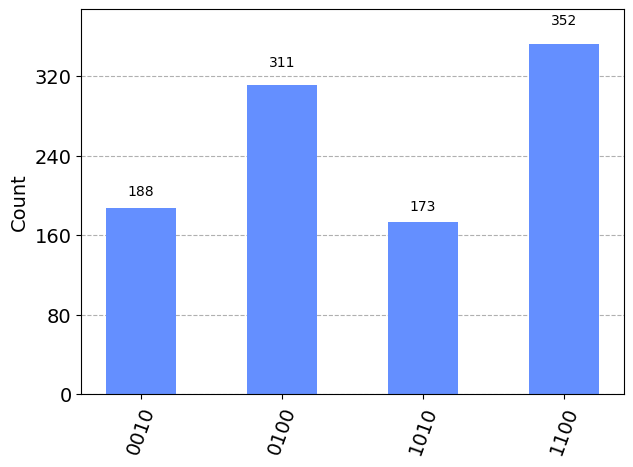

In [14]:
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for execution
qobj = assemble(transpiled_qc)

# Execute the job on the simulator
result = simulator.run(qobj).result()

# Get and plot the histogram of results
counts = result.get_counts()
plot_histogram(counts)

Explication  des résultats obtenus l'association des états de sortie au scénario correspondant :
Sachant que le qubit 4 est le choix de Monty, et que le qubit 3 est le choix du joueur. Notre objectif est de changer le choix du joueur à la porte 0 si monty ouvre la porte 1 et vice versa.  
En appliquant le SWAP entre q1 et q2, ensuite un CSWAP entre tel que q3 est le contrôle et q0 et q2 sont les cibles.  
Scénario 1 : 
 - qubit 3 = |0⟩ , c à d monty ouvre la porte 0. le SWAP entre q1 et q2 pour que le joueur choisisse la porte 1. Ensuite le CSWAP ne change rien car q3 est à |0⟩.
 Scénario 2 : 
 - qubit 3 = |1⟩ , c à d monty ouvre la porte 1. le SWAP entre q1 et q2. Ensuite le CSWAP change la valeur de q0 et q2 (alors q1 après le swap).

 Conclusion :
  - l'état |0010⟩ le joueur gagne la voiture, probabilité 1/3  ( Clarification : dernier qubit est le choix de Monty, avant dernier qubit représente si le joueur gagne ou pas la voiture)
  - l'état |0100⟩ le joueur ne gagne pas la voiture, probabilité 1/6
  - l'état |0101⟩ le joueur ne gagne pas la voiture, probabilité 1/6
  - l'état |0011⟩ le joueur  gagne pas la voiture, probabilité 1/3  
Alors la probabilité de gagner la voiture est 2/3 et la probabilité de ne pas gagner la voiture est 1/3.  
La stratégie 2 est plus avantageuse que la stratégie 1. Ces résultats sont cohérents avec les résultats théoriques et les résultats obtenus avec un ordinateur classique.